In [1]:
!pip install lightgbm

In [3]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import lightgbm as lgb
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings(action='ignore') 

In [4]:
weather = pd.read_csv('weather_v2.csv', parse_dates="date")
target = pd.read_csv('target_v2.csv')

In [5]:
#날짜마다 smp, supply 량을 알 수 있음
target

,date,smp_max,smp_min,smp_mean,supply
0,2018-02-01,150.65,116.84,132.71,87.47
1,2018-02-02,163.86,116.84,134.19,86.64
2,2018-02-03,164.07,116.85,131.39,88.28
3,2018-02-04,171.00,115.76,131.89,86.14
4,2018-02-05,170.34,123.89,137.96,90.63
...,...,...,...,...,...
833,2020-05-14,193.28,66.78,100.46,62.70
834,2020-05-15,198.23,61.81,102.38,64.91
835,2020-05-16,220.91,88.50,121.19,61.75
836,2020-05-17,207.75,65.78,116.82,61.55


In [33]:
#weathed data 지역과 날짜, 시간에 따른 날씨 지표를 볼 수 있음
weather.head(50)

,area,datetime,temp,temp_QCFlag,prec,prec_QCFlag,ws,ws_QCFlag,wd,wd_QCFlag,...,vis,sfctype,weathernumber,sfctemp,sfctemp_QCFlag,landtemp_5cm,landtemp_10cm,landtemp_20cm,landtemp_30cm,station
0,184,2018-02-01 01:00,4.7,0.0,NaN,NaN,3.6,0.0,20.0,0.0,...,1950.0,NaN,NaN,2.9,0.0,3.7,3.9,4.2,4.9,ASOS
1,184,2018-02-01 02:00,4.8,0.0,NaN,NaN,2.6,0.0,360.0,0.0,...,1865.0,NaN,NaN,2.9,0.0,3.6,3.8,4.2,4.9,ASOS
2,184,2018-02-01 03:00,4.8,0.0,NaN,NaN,4.6,0.0,20.0,0.0,...,1855.0,NaN,NaN,3.0,0.0,3.6,3.8,4.3,4.9,ASOS
3,184,2018-02-01 04:00,4.5,0.0,NaN,NaN,5.7,0.0,20.0,0.0,...,1425.0,NaN,NaN,3.0,0.0,3.6,3.8,4.2,5.0,ASOS
4,184,2018-02-01 05:00,4.5,0.0,NaN,9.0,4.4,0.0,20.0,0.0,...,1043.0,NaN,1.0,3.0,0.0,3.5,3.8,4.2,4.9,ASOS
5,184,2018-02-01 06:00,4.5,0.0,0.0,0.0,3.8,0.0,20.0,0.0,...,1024.0,NaN,NaN,2.9,0.0,3.5,3.8,4.2,5.0,ASOS
6,184,2018-02-01 07:00,4.7,0.0,NaN,9.0,5.3,0.0,20.0,0.0,...,974.0,NaN,40.0,2.9,0.0,3.5,3.7,4.1,5.0,ASOS
7,184,2018-02-01 08:00,4.5,0.0,NaN,9.0,4.5,0.0,20.0,0.0,...,943.0,NaN,40.0,2.8,0.0,3.5,3.7,4.2,4.9,ASOS
8,184,2018-02-01 09:00,4.4,0.0,NaN,9.0,4.1,0.0,20.0,0.0,...,968.0,NaN,4019.0,3.0,0.0,3.5,3.7,4.1,4.9,ASOS
9,184,2018-02-01 10:00,4.6,0.0,NaN,9.0,4.1,0.0,20.0,0.0,...,981.0,NaN,19.0,3.8,0.0,3.5,3.6,4.2,4.9,ASOS


In [34]:
weather

,area,datetime,temp,temp_QCFlag,prec,prec_QCFlag,ws,ws_QCFlag,wd,wd_QCFlag,...,vis,sfctype,weathernumber,sfctemp,sfctemp_QCFlag,landtemp_5cm,landtemp_10cm,landtemp_20cm,landtemp_30cm,station
0,184,2018-02-01 01:00,4.7,0.0,NaN,NaN,3.6,0.0,20.0,0.0,...,1950.0,NaN,NaN,2.9,0.0,3.7,3.9,4.2,4.9,ASOS
1,184,2018-02-01 02:00,4.8,0.0,NaN,NaN,2.6,0.0,360.0,0.0,...,1865.0,NaN,NaN,2.9,0.0,3.6,3.8,4.2,4.9,ASOS
2,184,2018-02-01 03:00,4.8,0.0,NaN,NaN,4.6,0.0,20.0,0.0,...,1855.0,NaN,NaN,3.0,0.0,3.6,3.8,4.3,4.9,ASOS
3,184,2018-02-01 04:00,4.5,0.0,NaN,NaN,5.7,0.0,20.0,0.0,...,1425.0,NaN,NaN,3.0,0.0,3.6,3.8,4.2,5.0,ASOS
4,184,2018-02-01 05:00,4.5,0.0,NaN,9.0,4.4,0.0,20.0,0.0,...,1043.0,NaN,1.0,3.0,0.0,3.5,3.8,4.2,4.9,ASOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746825,893,2020-05-18 19:00,16.4,NaN,0.5,NaN,4.1,NaN,302.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AWS
746826,893,2020-05-18 20:00,15.8,NaN,0.0,NaN,3.1,NaN,311.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AWS
746827,893,2020-05-18 21:00,15.1,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AWS
746828,893,2020-05-18 22:00,14.6,NaN,0.0,NaN,0.2,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AWS


In [35]:
!pip install missingno

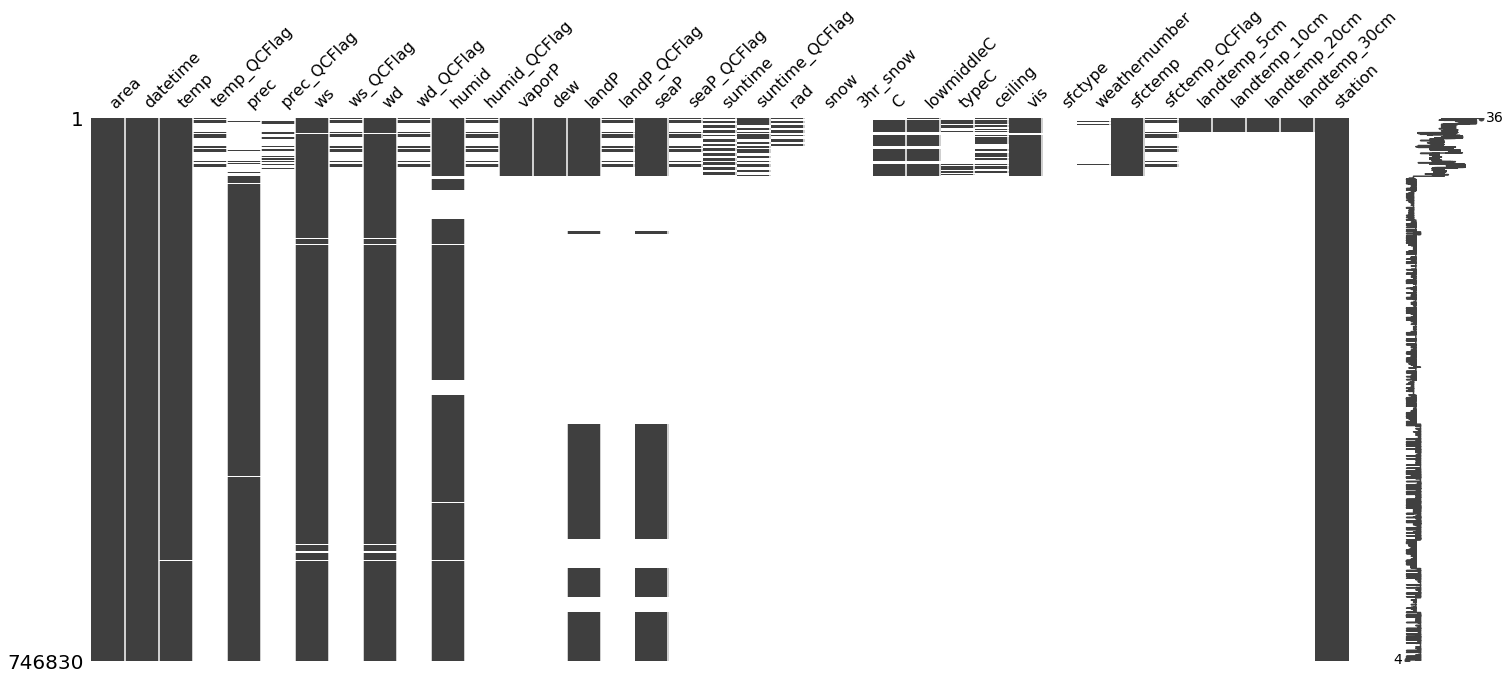

In [36]:
# 결측값 확인 missingno 라이브러리를 통해서( 하얀색이 많을 수록 결측치가 없는거임.)
import missingno as msno
msno.matrix(weather)

온도가 결측치가 제일 없음. 다른 결측치가 없는 날씨 요소는 매일 측정되지 않는 요소

In [37]:
#전체 값을 평균값으로, target data가 날짜별로 되어있으니 평균값으로 concat
weather['date'] = weather['datetime'].apply(lambda x : x[:10])
weather_mean = weather.groupby('date').mean().reset_index(drop = True)

In [38]:
weather.head(50)

,area,datetime,temp,temp_QCFlag,prec,prec_QCFlag,ws,ws_QCFlag,wd,wd_QCFlag,...,sfctype,weathernumber,sfctemp,sfctemp_QCFlag,landtemp_5cm,landtemp_10cm,landtemp_20cm,landtemp_30cm,station,date
0,184,2018-02-01 01:00,4.7,0.0,NaN,NaN,3.6,0.0,20.0,0.0,...,NaN,NaN,2.9,0.0,3.7,3.9,4.2,4.9,ASOS,2018-02-01
1,184,2018-02-01 02:00,4.8,0.0,NaN,NaN,2.6,0.0,360.0,0.0,...,NaN,NaN,2.9,0.0,3.6,3.8,4.2,4.9,ASOS,2018-02-01
2,184,2018-02-01 03:00,4.8,0.0,NaN,NaN,4.6,0.0,20.0,0.0,...,NaN,NaN,3.0,0.0,3.6,3.8,4.3,4.9,ASOS,2018-02-01
3,184,2018-02-01 04:00,4.5,0.0,NaN,NaN,5.7,0.0,20.0,0.0,...,NaN,NaN,3.0,0.0,3.6,3.8,4.2,5.0,ASOS,2018-02-01
4,184,2018-02-01 05:00,4.5,0.0,NaN,9.0,4.4,0.0,20.0,0.0,...,NaN,1.0,3.0,0.0,3.5,3.8,4.2,4.9,ASOS,2018-02-01
5,184,2018-02-01 06:00,4.5,0.0,0.0,0.0,3.8,0.0,20.0,0.0,...,NaN,NaN,2.9,0.0,3.5,3.8,4.2,5.0,ASOS,2018-02-01
6,184,2018-02-01 07:00,4.7,0.0,NaN,9.0,5.3,0.0,20.0,0.0,...,NaN,40.0,2.9,0.0,3.5,3.7,4.1,5.0,ASOS,2018-02-01
7,184,2018-02-01 08:00,4.5,0.0,NaN,9.0,4.5,0.0,20.0,0.0,...,NaN,40.0,2.8,0.0,3.5,3.7,4.2,4.9,ASOS,2018-02-01
8,184,2018-02-01 09:00,4.4,0.0,NaN,9.0,4.1,0.0,20.0,0.0,...,NaN,4019.0,3.0,0.0,3.5,3.7,4.1,4.9,ASOS,2018-02-01
9,184,2018-02-01 10:00,4.6,0.0,NaN,9.0,4.1,0.0,20.0,0.0,...,NaN,19.0,3.8,0.0,3.5,3.6,4.2,4.9,ASOS,2018-02-01


In [39]:
weather_mean

,area,temp,temp_QCFlag,prec,prec_QCFlag,ws,ws_QCFlag,wd,wd_QCFlag,humid,...,ceiling,vis,sfctype,weathernumber,sfctemp,sfctemp_QCFlag,landtemp_5cm,landtemp_10cm,landtemp_20cm,landtemp_30cm
0,714.270270,1.271798,0.0,0.003444,8.100000,3.523141,0.0,175.879137,0.0,67.423452,...,16.090909,1552.097826,NaN,689.666667,4.636957,0.0,4.186957,4.134783,4.426087,4.995652
1,714.270270,0.419820,0.0,0.000000,9.000000,3.852709,0.0,216.583973,0.0,57.458586,...,24.888889,1988.760417,NaN,NaN,4.097917,0.0,3.879167,3.933333,4.433333,5.191667
2,711.137615,-1.787600,0.0,0.289295,7.024390,5.602110,0.0,269.011723,0.0,76.501677,...,6.250000,1427.197917,NaN,136.750000,2.410417,0.0,3.441667,3.766667,4.362500,5.337500
3,714.270270,-3.873874,0.0,0.270012,6.483871,5.975114,0.0,273.509932,0.0,79.000126,...,4.625000,1330.406250,NaN,39.583333,1.398958,0.0,2.612500,2.979167,3.670833,4.933333
4,711.048276,-2.729229,0.0,0.243742,6.656250,5.134080,0.0,269.770637,0.0,77.278655,...,3.708333,1355.822917,NaN,8.000000,1.659375,0.0,2.362500,2.695833,3.350000,4.591667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,719.000000,16.911513,NaN,0.000000,NaN,3.341164,NaN,146.815038,NaN,54.062738,...,45.535714,1983.833333,NaN,NaN,21.121875,NaN,20.137500,20.795833,20.370833,19.833333
834,719.000000,18.643202,NaN,1.988746,9.000000,3.897588,NaN,173.301864,NaN,92.253810,...,7.787879,868.489583,NaN,18543.187500,20.453125,NaN,20.762500,21.425000,20.795833,20.116667
835,718.531353,17.191510,NaN,0.168819,9.000000,1.884323,NaN,199.394625,NaN,91.198443,...,5.868852,306.729167,NaN,16953.936170,20.636458,NaN,20.641667,21.283333,20.850000,20.358333
836,719.000000,16.407675,NaN,0.000000,9.000000,1.934122,NaN,162.449099,NaN,80.912143,...,12.363636,925.260417,NaN,7313.703704,21.482292,NaN,20.408333,21.045833,20.558333,20.125000


In [40]:
target

,date,smp_max,smp_min,smp_mean,supply
0,2018-02-01,150.65,116.84,132.71,87.47
1,2018-02-02,163.86,116.84,134.19,86.64
2,2018-02-03,164.07,116.85,131.39,88.28
3,2018-02-04,171.00,115.76,131.89,86.14
4,2018-02-05,170.34,123.89,137.96,90.63
...,...,...,...,...,...
833,2020-05-14,193.28,66.78,100.46,62.70
834,2020-05-15,198.23,61.81,102.38,64.91
835,2020-05-16,220.91,88.50,121.19,61.75
836,2020-05-17,207.75,65.78,116.82,61.55


In [41]:
# 날씨 지표와 상관관계 분석
#기온이 가장 상관관계가 높음을 알 수 있다.
pd.concat([target,weather_mean], axis = 1).corr().loc['smp_max':'supply','area':].abs().mean().sort_values(ascending = False)

landtemp_30cm     0.323563
landtemp_5cm      0.300492
landtemp_20cm     0.293111
landtemp_10cm     0.292360
temp              0.291700
sfctemp           0.283049
dew               0.269303
vaporP            0.246189
landP             0.223619
seaP              0.182458
wd                0.177165
3hr_snow          0.167618
ws                0.157772
snow              0.156866
humid_QCFlag      0.154515
sfctemp_QCFlag    0.153341
area              0.151446
landP_QCFlag      0.149839
seaP_QCFlag       0.144882
suntime_QCFlag    0.137409
temp_QCFlag       0.126696
wd_QCFlag         0.118105
lowmiddleC        0.104231
ws_QCFlag         0.097090
humid             0.094693
prec_QCFlag       0.089010
rad               0.087645
vis               0.063934
suntime           0.055322
ceiling           0.053021
prec              0.045751
C                 0.040559
weathernumber     0.019332
sfctype                NaN
dtype: float64

In [42]:
#datetime 전처리 -> datetime 속성으로변화
target['date'] = pd.to_datetime(target['date'])

target['year'] = target['date'].dt.year
target['month'] = target['date'].dt.month
target['day'] = target['date'].dt.day
target['dayofweek'] = target['date'].dt.dayofweek

In [43]:
import requests
import xmltodict
import json

In [44]:
#시계열 분석에서 한국 공휴일 api추가
key = "MoWjfkWS0aa1pVz1%2B38Ec1KusKDhrxZx4sU3I0RdIQvIcMjNUa6O454%2BtRJLpmA2Mi2FeJ1SjTyBGlNxLM6Mjw%3D%3D"

holidays = pd.DataFrame(columns=['date','name'])
date_list = []
name_list = []

for year_ in ['2018','2019','2020']:    
    for month in ['01','02','03','04','05','06','07','08','09','10','11','12']:
        url = "http://apis.data.go.kr/B090041/openapi/service/SpcdeInfoService/getHoliDeInfo?solYear="+year_+"&solMonth="+month+"&ServiceKey="+key
        content = requests.get(url).content

        #xml을 json으로 변환
        dict = xmltodict.parse(content)

        #json 파일로 변환
        jsonString = json.dumps(dict['response']['body'], ensure_ascii = False) #'아스키코드가 아니다' 라는 파라미터 추가

        #파이썬에서 다룰수 있게 변환
        jsonObj = json.loads(jsonString)

        if jsonObj['items'] == None:
            continue

        holi_dict = jsonObj['items']['item']

        if type(holi_dict) == list: 
            for i in range(len(holi_dict)):
                date_list.append(holi_dict[i]['locdate'])
                name_list.append(holi_dict[i]['dateName'])
        else:
            date_list.append(holi_dict['locdate'])
            name_list.append(holi_dict['dateName'])

date_arr = np.array(date_list)
name_arr = np.array(name_list)

holidays['date'] = date_arr
holidays['name'] = name_arr
holidays['date'] = pd.to_datetime(holidays['date'])

In [45]:
# 데이터 합치기
target = pd.merge(target,holidays,on='date',how='left')


In [46]:
target.head()

,date,smp_max,smp_min,smp_mean,supply,year,month,day,dayofweek,name
0,2018-02-01,150.65,116.84,132.71,87.47,2018,2,1,3,NaN
1,2018-02-02,163.86,116.84,134.19,86.64,2018,2,2,4,NaN
2,2018-02-03,164.07,116.85,131.39,88.28,2018,2,3,5,NaN
3,2018-02-04,171.00,115.76,131.89,86.14,2018,2,4,6,NaN
4,2018-02-05,170.34,123.89,137.96,90.63,2018,2,5,0,NaN


In [51]:
target.columns = target.columns.str.replace('name', 'holidays')

In [52]:
target

,date,smp_max,smp_min,smp_mean,supply,year,month,day,dayofweek,holidays
0,2018-02-01,150.65,116.84,132.71,87.47,2018,2,1,3,NaN
1,2018-02-02,163.86,116.84,134.19,86.64,2018,2,2,4,NaN
2,2018-02-03,164.07,116.85,131.39,88.28,2018,2,3,5,NaN
3,2018-02-04,171.00,115.76,131.89,86.14,2018,2,4,6,NaN
4,2018-02-05,170.34,123.89,137.96,90.63,2018,2,5,0,NaN
...,...,...,...,...,...,...,...,...,...,...
833,2020-05-14,193.28,66.78,100.46,62.70,2020,5,14,3,NaN
834,2020-05-15,198.23,61.81,102.38,64.91,2020,5,15,4,NaN
835,2020-05-16,220.91,88.50,121.19,61.75,2020,5,16,5,NaN
836,2020-05-17,207.75,65.78,116.82,61.55,2020,5,17,6,NaN


In [53]:
# # 열 이름 변경
# names = target.columns.tolist()
# names[names.index('name_x')] = 'holidays'
# target.columns = names
# 공휴일 특성 이진수로 변경
target['holidays'].fillna(0, inplace = True)


In [54]:
target

,date,smp_max,smp_min,smp_mean,supply,year,month,day,dayofweek,holidays
0,2018-02-01,150.65,116.84,132.71,87.47,2018,2,1,3,0
1,2018-02-02,163.86,116.84,134.19,86.64,2018,2,2,4,0
2,2018-02-03,164.07,116.85,131.39,88.28,2018,2,3,5,0
3,2018-02-04,171.00,115.76,131.89,86.14,2018,2,4,6,0
4,2018-02-05,170.34,123.89,137.96,90.63,2018,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...
833,2020-05-14,193.28,66.78,100.46,62.70,2020,5,14,3,0
834,2020-05-15,198.23,61.81,102.38,64.91,2020,5,15,4,0
835,2020-05-16,220.91,88.50,121.19,61.75,2020,5,16,5,0
836,2020-05-17,207.75,65.78,116.82,61.55,2020,5,17,6,0


In [55]:
# 공휴일 특성 이진수로 변경
target['holidays'].fillna(0, inplace = True)

for i in range(len(target)):
    if target['holidays'][i] ==0:
        continue
    else:
        target['holidays'][i] = 1

# 타입 변경
target['holidays'] = target['holidays'].astype(int)

In [56]:
#유가데이터크롤링
from datetime import datetime
from time import sleep

def get_oil_price(code):
    delay = 0.01
    page = 1
    result = []
    start_date = '2018.02.01'
    end_date = '2020.05.18'
    start_time = datetime.now()
    
    # 수집
    print('[{}] 데이터 수집을 시작합니다. (code: {})'.format(start_time.strftime('%Y/%m/%d %H:%M:%S'), code))
    while(True):
        url = 'https://finance.naver.com/marketindex/worldDailyQuote.nhn?marketindexCd={}&fdtc=2&page={}'.format(code, page)
        data = pd.read_html(url)[0].dropna()
        if page != 1:
            try:
                if start_date in data.iloc[:,0].values:
                    data = data.loc[:data.iloc[:,0].values.tolist().index(start_date),]
                    result.append(data)
                    break
            except:
                break
        result.append(data)
        page += 1
        time.sleep(delay)
    
    # 가공
    oil_price = pd.concat(result).reset_index(drop=True)
    oil_price.columns = ['date', 'price', '전일대비', '등락율']
    oil_price = oil_price.loc[oil_price['date'].tolist().index(end_date):,]
    oil_price['date'] = oil_price['date'].apply(lambda x: datetime.strptime(x, '%Y.%m.%d'))
    oil_price = oil_price[['date', 'price']]
    oil_price.insert(0, 'code', code)
    oil_price = oil_price[::-1].reset_index(drop=True)
    
    end_time = datetime.now()
    print('[{}] 데이터 수집을 종료합니다. (code: {}, 수집시간: {}초, 데이터수: {:,}개)'.format(end_time.strftime('%Y/%m/%d %H:%M:%S'), code, (end_time-start_time).seconds, len(oil_price)))
    return oil_price

In [57]:
import time
oil_price_du = get_oil_price('OIL_DU')
oil_price_wti = get_oil_price('OIL_CL')
oil_price_brent = get_oil_price('OIL_BRT')

[2020/07/24 11:41:16] 데이터 수집을 시작합니다. (code: OIL_DU)
[2020/07/24 11:41:26] 데이터 수집을 종료합니다. (code: OIL_DU, 수집시간: 10초, 데이터수: 577개)
[2020/07/24 11:41:26] 데이터 수집을 시작합니다. (code: OIL_CL)
[2020/07/24 11:41:34] 데이터 수집을 종료합니다. (code: OIL_CL, 수집시간: 8초, 데이터수: 578개)
[2020/07/24 11:41:34] 데이터 수집을 시작합니다. (code: OIL_BRT)
[2020/07/24 11:41:44] 데이터 수집을 종료합니다. (code: OIL_BRT, 수집시간: 9초, 데이터수: 588개)


In [58]:
oil_list = []
oil_list.append(oil_price_du)
oil_list.append(oil_price_wti)
oil_list.append(oil_price_brent)
code_list = ['OIL_DU','OIL_CL','OIL_BRT']

for i, code in enumerate(code_list):
    oil_list[i].drop(['code'],axis=1,inplace=True)
    oil_list[i].columns = ['date',str(code)+'_price']

In [59]:
start = '2018-02-01'
end = '2020-05-18'
daily_price_oil = pd.DataFrame(columns = ['date'])
date_range = pd.date_range(start,end,freq = 'D')
daily_price_oil['date'] = date_range

In [60]:
for d in oil_list:
    daily_price_oil = daily_price_oil.merge(d,how='outer')

In [61]:
daily_price_oil['mean'] = round(daily_price_oil.mean(axis=1),2)
daily_price_oil = daily_price_oil.loc[:,['date','mean']]
daily_price_oil.columns = ['date','oil_price']

In [62]:
# 총 세번 진행
daily_price_oil['oil_price'][daily_price_oil['oil_price'].isna()] = daily_price_oil.shift(-1)['oil_price'][daily_price_oil['oil_price'].isna()]
daily_price_oil['oil_price'][daily_price_oil['oil_price'].isna()] = daily_price_oil.shift(-1)['oil_price'][daily_price_oil['oil_price'].isna()]
daily_price_oil['oil_price'][daily_price_oil['oil_price'].isna()] = daily_price_oil.shift(-1)['oil_price'][daily_price_oil['oil_price'].isna()]

In [63]:
target['oil_price'] = daily_price_oil['oil_price']

In [64]:
target['oil_price'].isnull().sum()

0

In [65]:
weather = weather[weather['station'] == 'ASOS']
#제주도 고산 성산 서귀포라고 함

In [66]:
#weathed  데이타 전처리 - temp만 남겨놓는다
weather['datetime'] = pd.to_datetime(weather['datetime'])
weather = weather.loc[:,'area':'temp']

In [67]:
#area별로 리스트에묶어야함
weather

,area,datetime,temp
0,184,2018-02-01 01:00:00,4.7
1,184,2018-02-01 02:00:00,4.8
2,184,2018-02-01 03:00:00,4.8
3,184,2018-02-01 04:00:00,4.5
4,184,2018-02-01 05:00:00,4.5
...,...,...,...
80427,189,2020-05-18 19:00:00,19.0
80428,189,2020-05-18 20:00:00,19.8
80429,189,2020-05-18 21:00:00,18.9
80430,189,2020-05-18 22:00:00,18.1


In [68]:
#weather  데이타 전처리 - temp만 남겨놓는다, 배열로, 지역별로
weather_list = []
for area in weather['area'].unique():
    weather_list.append(weather[weather['area']==area].copy())
    
for i, area in enumerate(weather['area'].unique()):
    weather_list[i].drop(['area'], axis=1, inplace=True)
    weather_list[i].columns = ['datetime', str(area)+'_temp']

In [69]:
#각 지역의 시간별 기온을 모두 합하고, median 값으로 열을 만든다.
start = '2018-02-01'
end = '2020-01-31'
hourly_temperature = pd.DataFrame(columns = ['datetime'])
date_range = pd.date_range(start, end, freq='H')
hourly_temperature['datetime'] = date_range

for d in weather_list:
    hourly_temperature  = hourly_temperature.merge(d, how='outer')
hourly_temperature['median'] = hourly_temperature.median(axis=1)
hourly_temperature = hourly_temperature.loc[:,['datetime', 'median']]
hourly_temperature.columns = ['date', 'temperature']

In [70]:
hourly_temperature 

,date,temperature
0,2018-02-01 00:00:00,NaN
1,2018-02-01 01:00:00,3.80
2,2018-02-01 02:00:00,3.95
3,2018-02-01 03:00:00,3.75
4,2018-02-01 04:00:00,3.35
...,...,...
20107,2020-05-18 19:00:00,18.40
20108,2020-05-18 20:00:00,17.35
20109,2020-05-18 21:00:00,16.90
20110,2020-05-18 22:00:00,16.55


In [71]:
# 결측치는 1시간 후 온도로 처리
hourly_temperature['temperature'][hourly_temperature['temperature'].isna()] = hourly_temperature.shift(-1)['temperature'][hourly_temperature['temperature'].isna()]

In [72]:
hourly_temperature['temperature'].isnull().sum()

0

In [73]:
start = '2018-02-01'
end = '2020-01-31'
daily_temperature = pd.DataFrame(columns = ['date'])
date_range = pd.date_range(start, end, freq='D')
daily_temperature['date'] = date_range

In [74]:
#24시간을 병렬적으로 만듦
for d in range(daily_temperature.shape[0]):
    for h in range(24):
        daily_temperature.loc[d, 'temp_h'+str(h)] = hourly_temperature['temperature'][d*24:d*24+24][d*24+h]

In [75]:
daily_temperature['temp_max'] = daily_temperature.loc[:,'temp_h0':].max(axis=1)
daily_temperature['temp_min'] = daily_temperature.loc[:,'temp_h0':].min(axis=1)
daily_temperature['temp_mean'] = daily_temperature.loc[:,'temp_h0':].mean(axis=1)

In [76]:
daily_temperature.head()

,date,temp_h0,temp_h1,temp_h2,temp_h3,temp_h4,temp_h5,temp_h6,temp_h7,temp_h8,...,temp_h17,temp_h18,temp_h19,temp_h20,temp_h21,temp_h22,temp_h23,temp_max,temp_min,temp_mean
0,2018-02-01,3.80,3.80,3.95,3.75,3.35,3.45,3.6,3.65,3.70,...,5.00,4.25,4.15,4.00,3.75,3.40,3.3,5.95,3.30,4.298077
1,2018-02-02,3.20,2.85,2.75,2.60,2.60,2.70,2.6,2.45,2.55,...,4.10,3.85,3.95,3.95,3.85,3.95,4.0,5.25,2.45,3.576923
2,2018-02-03,3.90,4.00,3.80,3.70,3.35,2.75,2.9,1.35,1.55,...,0.30,0.20,0.25,-0.20,-0.50,-0.30,-0.2,4.00,-0.50,1.457692
3,2018-02-04,-0.65,-1.20,-1.35,-0.70,-1.65,-1.55,-1.4,-2.05,-1.60,...,-0.80,-1.00,-0.65,-1.20,-1.00,-1.30,-1.2,0.30,-2.05,-1.000000
4,2018-02-05,-0.95,-1.70,-1.45,-1.15,-0.95,-0.60,-0.2,-0.25,-0.70,...,1.45,1.20,0.10,0.20,0.55,0.15,-0.7,2.05,-1.70,0.015385


In [77]:
target['temp_max'] = daily_temperature['temp_max']
target['temp_min'] =daily_temperature['temp_min']
target['temp_mean'] = daily_temperature['temp_mean']

In [78]:
#날짜별로 smp, temp, 최대최소평균
target

,date,smp_max,smp_min,smp_mean,supply,year,month,day,dayofweek,holidays,oil_price,temp_max,temp_min,temp_mean
0,2018-02-01,150.65,116.84,132.71,87.47,2018,2,1,3,0,67.39,5.95,3.30,4.298077
1,2018-02-02,163.86,116.84,134.19,86.64,2018,2,2,4,0,66.59,5.25,2.45,3.576923
2,2018-02-03,164.07,116.85,131.39,88.28,2018,2,3,5,0,65.59,4.00,-0.50,1.457692
3,2018-02-04,171.00,115.76,131.89,86.14,2018,2,4,6,0,65.59,0.30,-2.05,-1.000000
4,2018-02-05,170.34,123.89,137.96,90.63,2018,2,5,0,0,65.59,2.05,-1.70,0.015385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,2020-05-14,193.28,66.78,100.46,62.70,2020,5,14,3,0,29.30,NaN,NaN,NaN
834,2020-05-15,198.23,61.81,102.38,64.91,2020,5,15,4,0,30.58,NaN,NaN,NaN
835,2020-05-16,220.91,88.50,121.19,61.75,2020,5,16,5,0,32.39,NaN,NaN,NaN
836,2020-05-17,207.75,65.78,116.82,61.55,2020,5,17,6,0,32.39,NaN,NaN,NaN


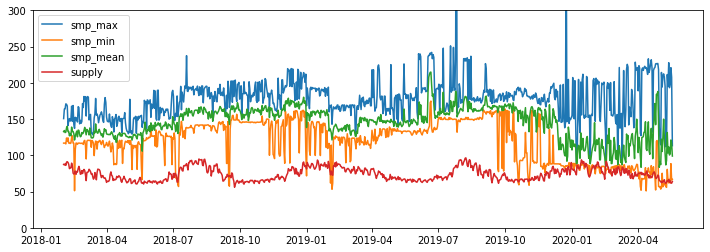

In [79]:
#날짜별 시각화
plt.rcParams['figure.figsize'] = [12, 4]
plt.plot(target.loc[:, 'date'], target.loc[:, 'smp_max'], label='smp_max')
plt.plot(target.loc[:, 'date'], target.loc[:, 'smp_min'], label='smp_min')
plt.plot(target.loc[:, 'date'], target.loc[:, 'smp_mean'], label='smp_mean')
plt.plot(target.loc[:, 'date'], target.loc[:, 'supply'], label='supply')
plt.ylim(0,300)
plt.legend()
plt.show()

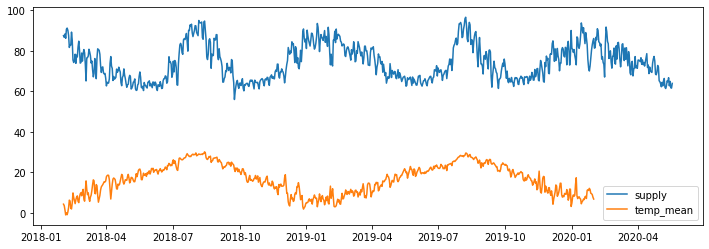

In [80]:
#온도와 시각화 - 월별로 추세가 다른것으로 보임 ( 상관관계가 있는 달과 아닌 달이 있음)
plt.rcParams['figure.figsize'] = [12, 4]
plt.plot(target.loc[:, 'date'], target.loc[:, 'supply'], label='supply')
plt.plot(target.loc[:, 'date'], target.loc[:, 'temp_mean'], label='temp_mean')
plt.legend()
plt.show()

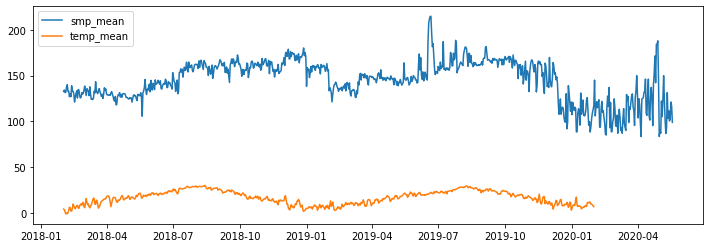

In [81]:
plt.rcParams['figure.figsize'] = [12, 4]
plt.plot(target.loc[:, 'date'], target.loc[:, 'smp_mean'], label='smp_mean')
plt.plot(target.loc[:, 'date'], target.loc[:, 'temp_mean'], label='temp_mean')
plt.legend()
plt.show()

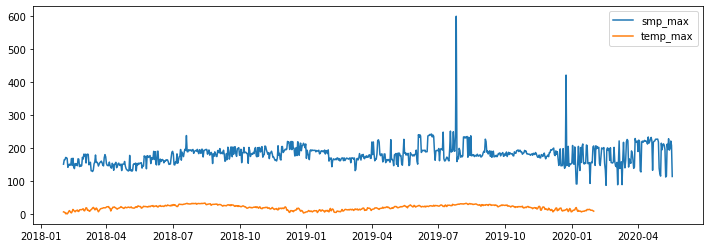

In [82]:
plt.rcParams['figure.figsize'] = [12, 4]
plt.plot(target.loc[:, 'date'], target.loc[:, 'smp_max'], label='smp_max')
plt.plot(target.loc[:, 'date'], target.loc[:, 'temp_max'], label='temp_max')
plt.legend()
plt.show()

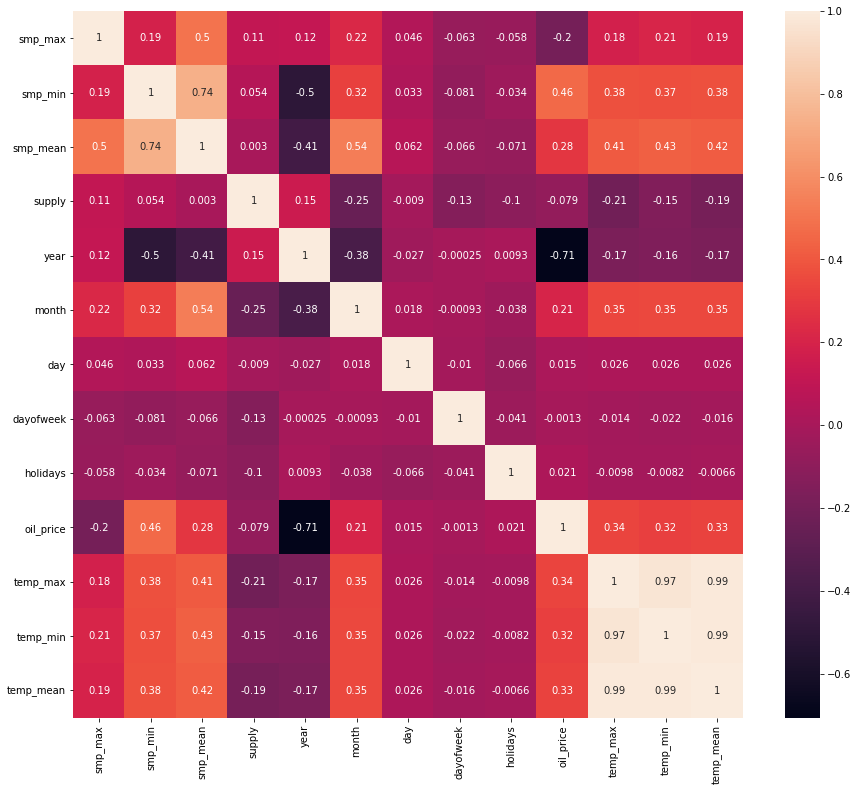

In [83]:
plt.rcParams['figure.figsize'] = [15, 13]
sns.heatmap(target.corr(), annot=True)

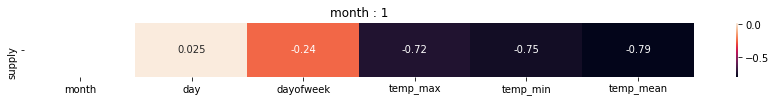

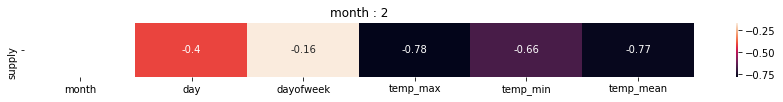

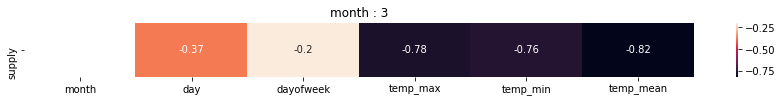

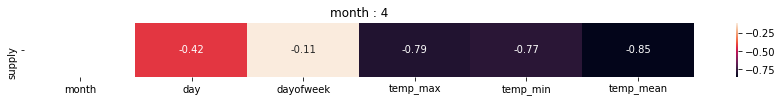

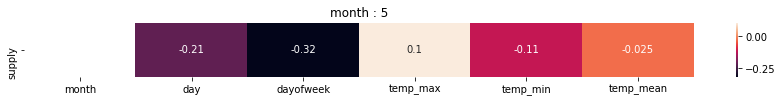

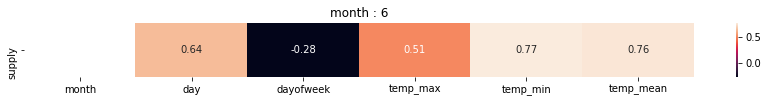

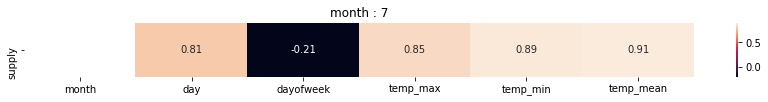

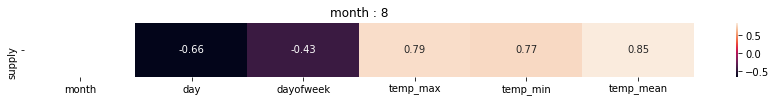

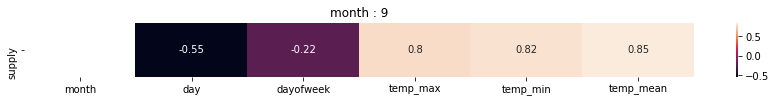

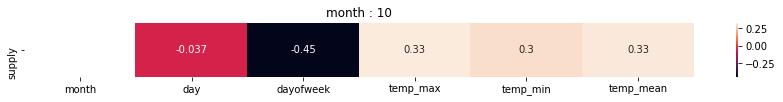

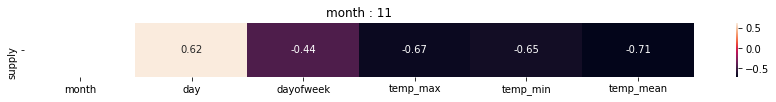

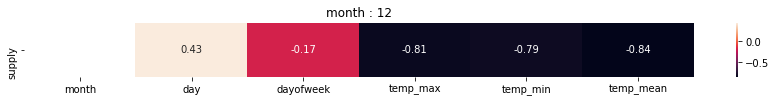

In [84]:
plt.rcParams['figure.figsize'] = [15, 1]
for m in range(1, 13):
    sns.heatmap(target[target['date'].dt.month == m].corr().loc[['supply'],['month', 'day', 'dayofweek', 'temp_max', 'temp_min', 'temp_mean']], annot=True)
    plt.title('month : '+ str(m))
    plt.show()

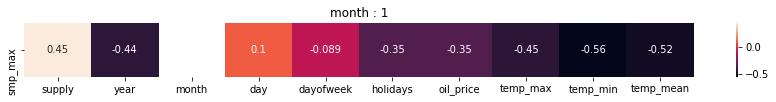

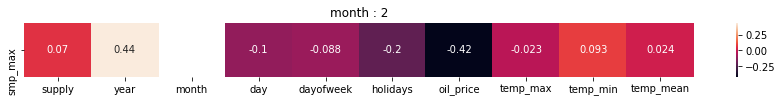

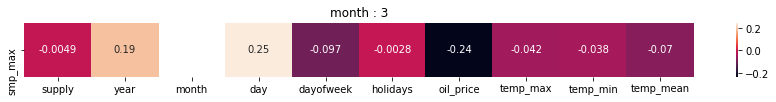

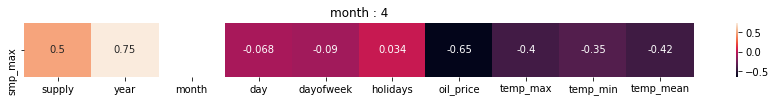

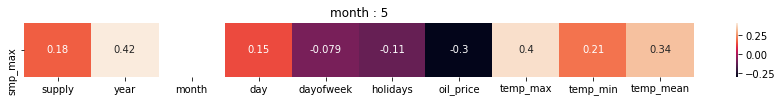

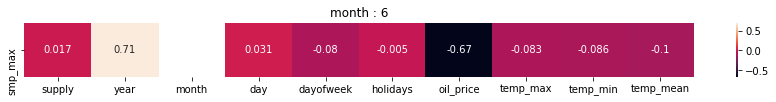

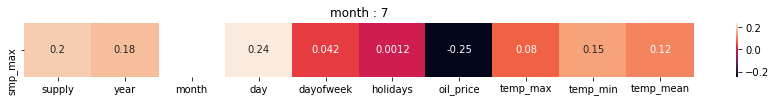

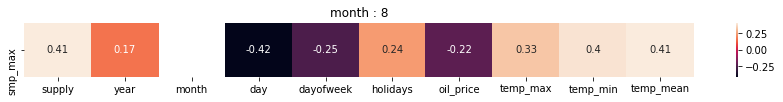

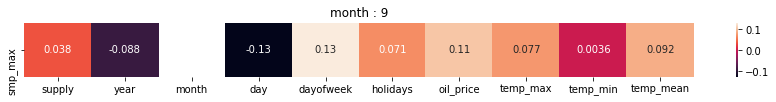

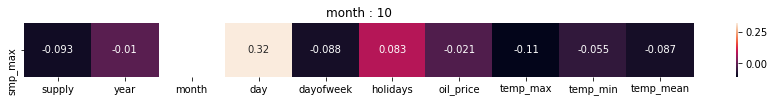

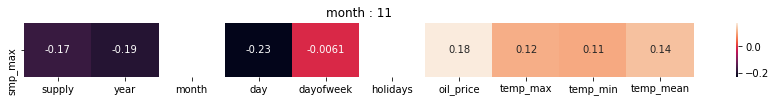

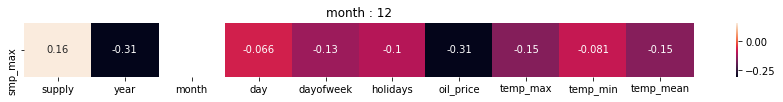

In [85]:
plt.rcParams['figure.figsize'] = [15, 1]
for m in range(1, 13):
    sns.heatmap(target[target['date'].dt.month == m].corr().loc[['smp_max'],'supply':], annot=True)
    plt.title('month : '+ str(m))
    plt.show()

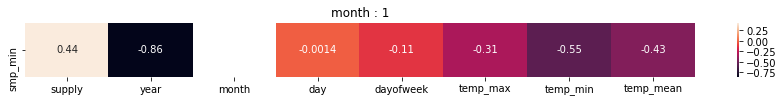

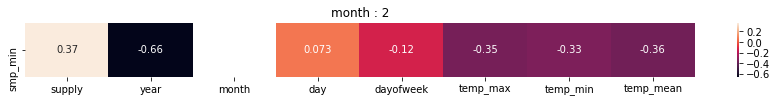

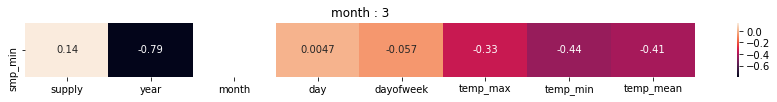

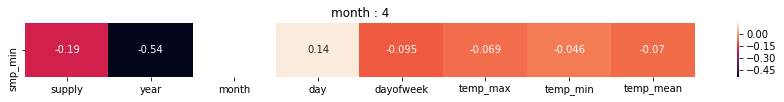

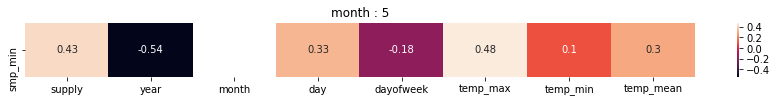

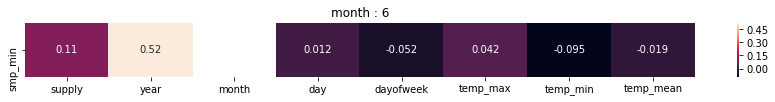

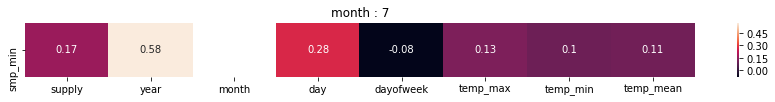

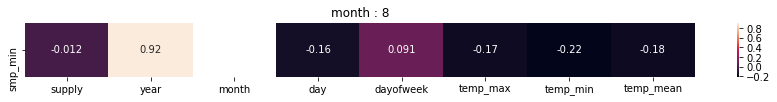

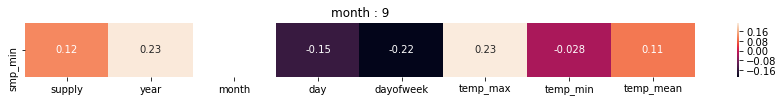

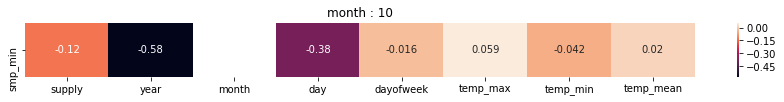

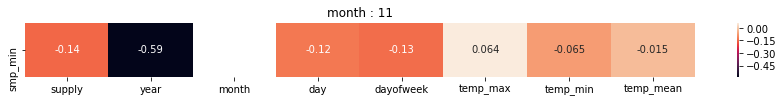

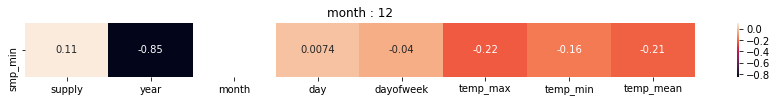

In [34]:
plt.rcParams['figure.figsize'] = [15, 1]
for m in range(1, 13):
    sns.heatmap(target[target['date'].dt.month == m].corr().loc[['smp_min'],'supply':], annot=True)
    plt.title('month : '+ str(m))
    plt.show()

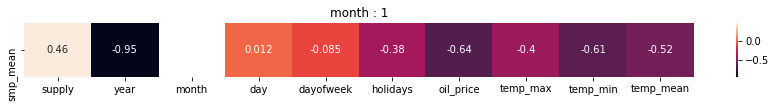

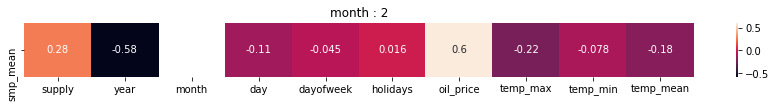

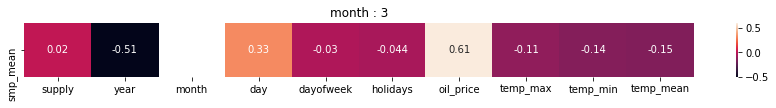

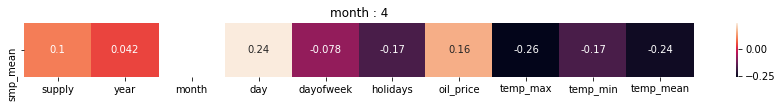

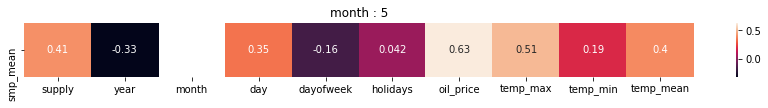

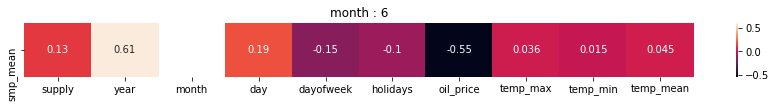

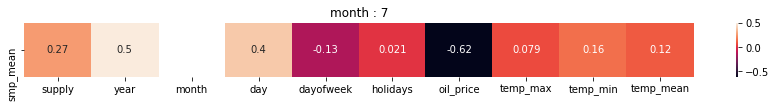

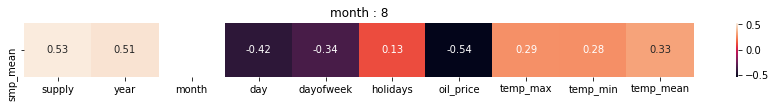

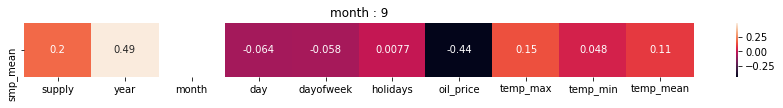

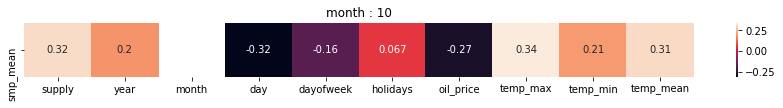

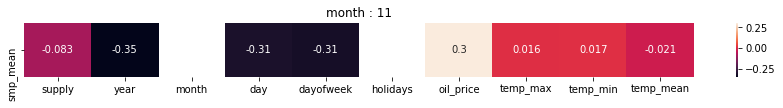

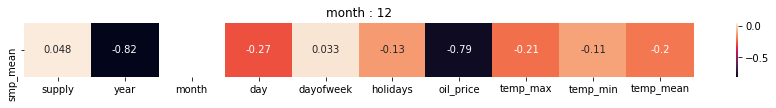

In [86]:
plt.rcParams['figure.figsize'] = [15, 1]
for m in range(1, 13):
    sns.heatmap(target[target['date'].dt.month == m].corr().loc[['smp_mean'],'supply':], annot=True)
    plt.title('month : '+ str(m))
    plt.show()

# 모델생성

In [163]:
def create_model(train, val):
    params = {
        'metric': 'mae',
        'seed':7777
        }

    model = lgb.train(params, d_train, 1000, d_val, verbose_eval=1000, early_stopping_rounds=100)
    
    plt.rcParams['figure.figsize'] = [6, 4]
    plt.plot(np.array(y_val), '.-', label='y_val')
    plt.plot(model.predict(x_val), '.-', label='y_pred')
    plt.title(str(future)+'days later')
    plt.legend()
    plt.show()

    return model

In [164]:
def trans(dataset, start_index, end_index, past, future, x_columns, y_columns):
    dataset.index = range(dataset.shape[0])
    data = []
    labels = []
    
    start_index = start_index + past
    
    if end_index is None:
        end_index = dataset.shape[0]
    
    for i in range(start_index, end_index-future):
        indices = np.array(dataset.loc[i-past:i, x_columns])
        data.append(indices)
        
        labels.append(np.array(dataset.loc[i+future, y_columns]))
        
    data = np.array(data)
    data = data.reshape(data.shape[0], -1)
    labels = np.array(labels)
    labels = labels.reshape(-1)
    
    return data, labels

In [165]:
past = 29# 최근 30일 정보를 이용하여 n일 후를 예측

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[40]	valid_0's l1: 3.98991


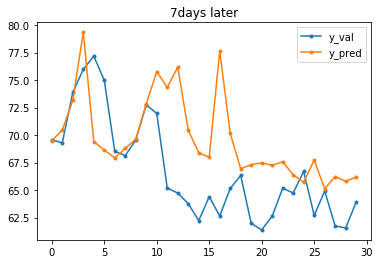

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[95]	valid_0's l1: 3.91513


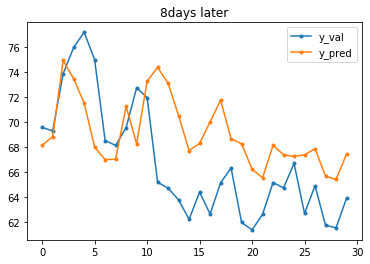

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[62]	valid_0's l1: 3.93944


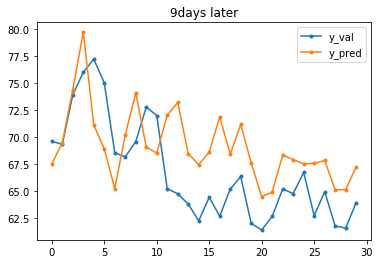

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	valid_0's l1: 3.77876


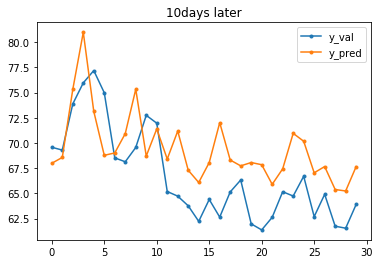

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[459]	valid_0's l1: 4.04058


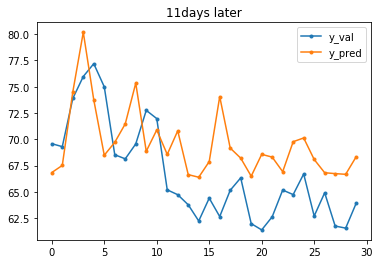

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[100]	valid_0's l1: 3.86199


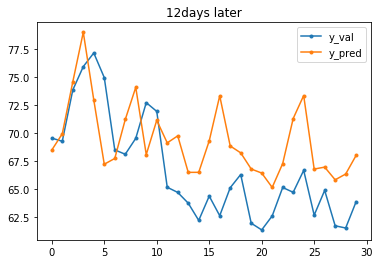

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[67]	valid_0's l1: 4.17374


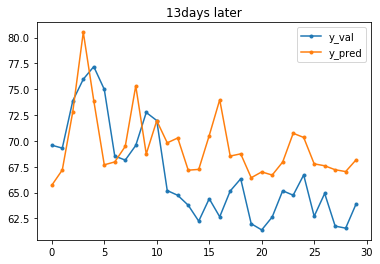

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's l1: 4.64249


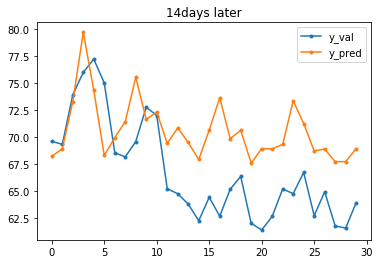

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[83]	valid_0's l1: 4.19154


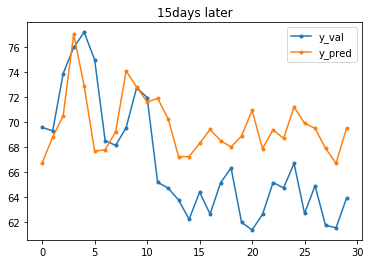

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	valid_0's l1: 4.59449


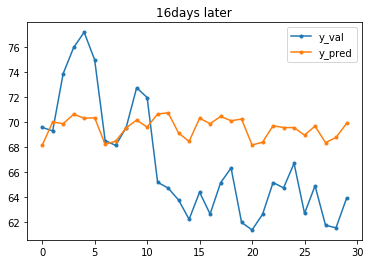

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's l1: 4.51702


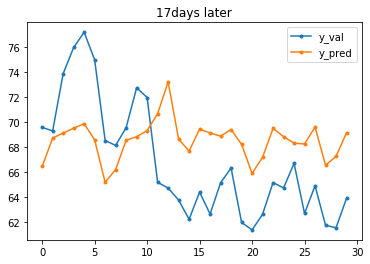

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's l1: 4.39549


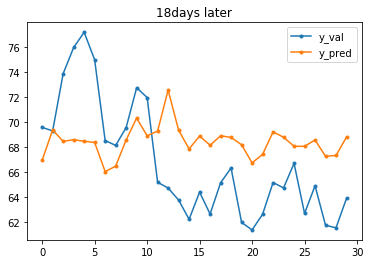

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's l1: 4.2621


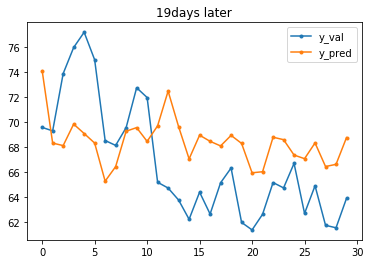

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's l1: 4.4568


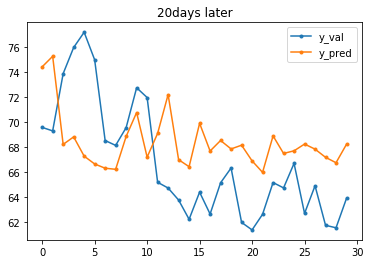

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's l1: 4.23974


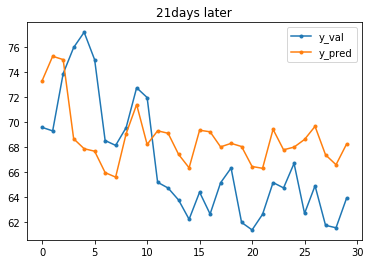

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[79]	valid_0's l1: 4.0858


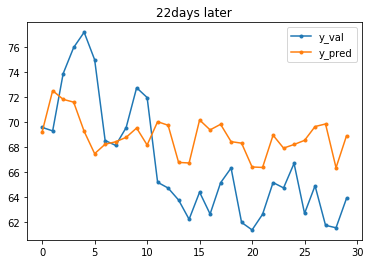

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's l1: 4.24866


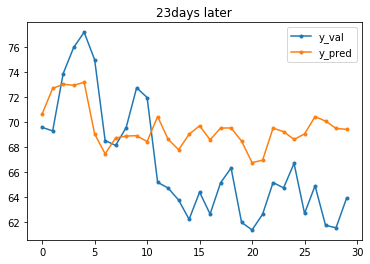

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's l1: 4.71541


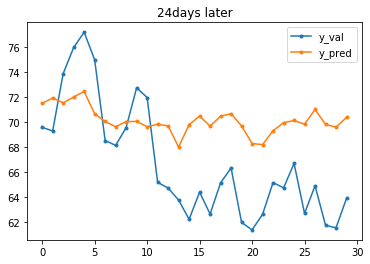

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[84]	valid_0's l1: 4.88359


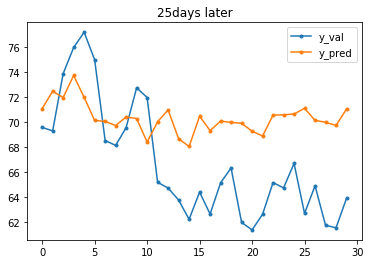

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[147]	valid_0's l1: 5.44805


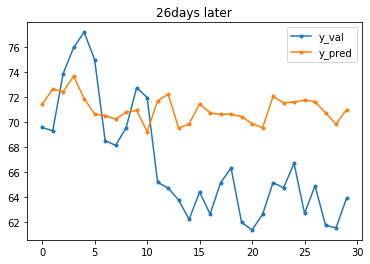

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	valid_0's l1: 4.6913


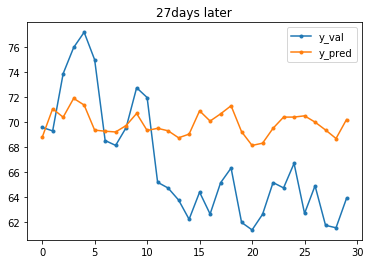

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's l1: 4.96693


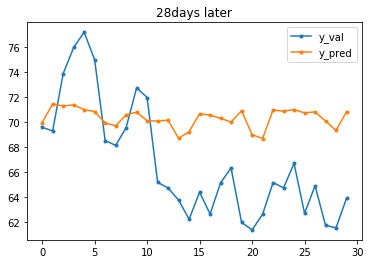

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[75]	valid_0's l1: 5.31262


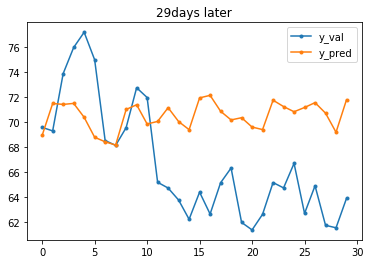

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[77]	valid_0's l1: 5.50756


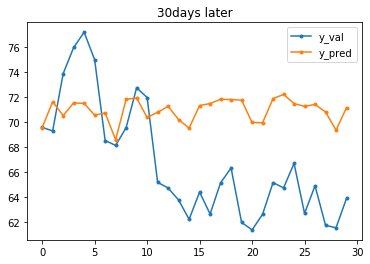

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's l1: 5.44792


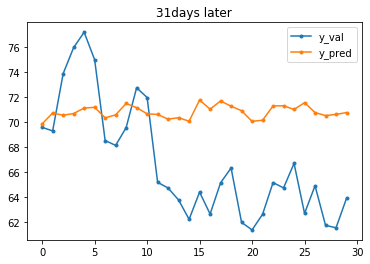

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[34]	valid_0's l1: 5.70287


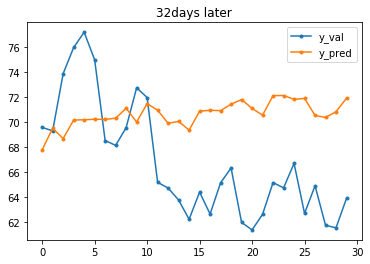

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's l1: 6.30722


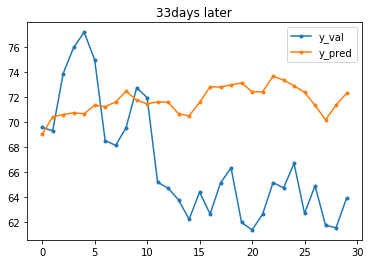

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[13]	valid_0's l1: 6.24043


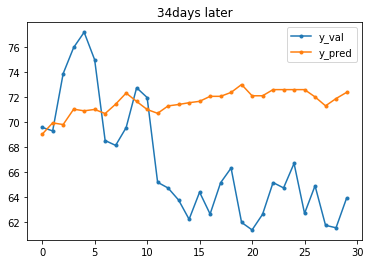

In [166]:
x_columns = ['year','month','day','dayofweek','supply', 'holidays','temp_max', 'temp_min', 'temp_mean','oil_price']
y_columns = ['supply']
supply_models = {}

# 7일~34일 후를 예측하는 각각의 모델 구축
for future in range(7, 35):
    train_split = target.shape[0]-past-future-30 # 마지막 30일을 validation set으로 사용
    x_train, y_train = trans(target, 0, train_split, past, future, x_columns, y_columns)
    x_val, y_val = trans(target, train_split, None, past, future, x_columns, y_columns)
    
    d_train = lgb.Dataset(x_train, y_train)
    d_val = lgb.Dataset(x_val, y_val)

    supply_models[future] = create_model(d_train, d_val)
    print('==========================================================================')